In [10]:
import pandas as pd
import numpy as np

In [11]:
data_path = '../data/housing.csv'
data = pd.read_csv(data_path)

In [12]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [14]:
data["ocean_proximity"].value_counts()
# Shows what categories exist and how many districs belong to each category:

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Note: Null values are ignored. For example, the count of total_bedrooms is 20,433 and not 20,640.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

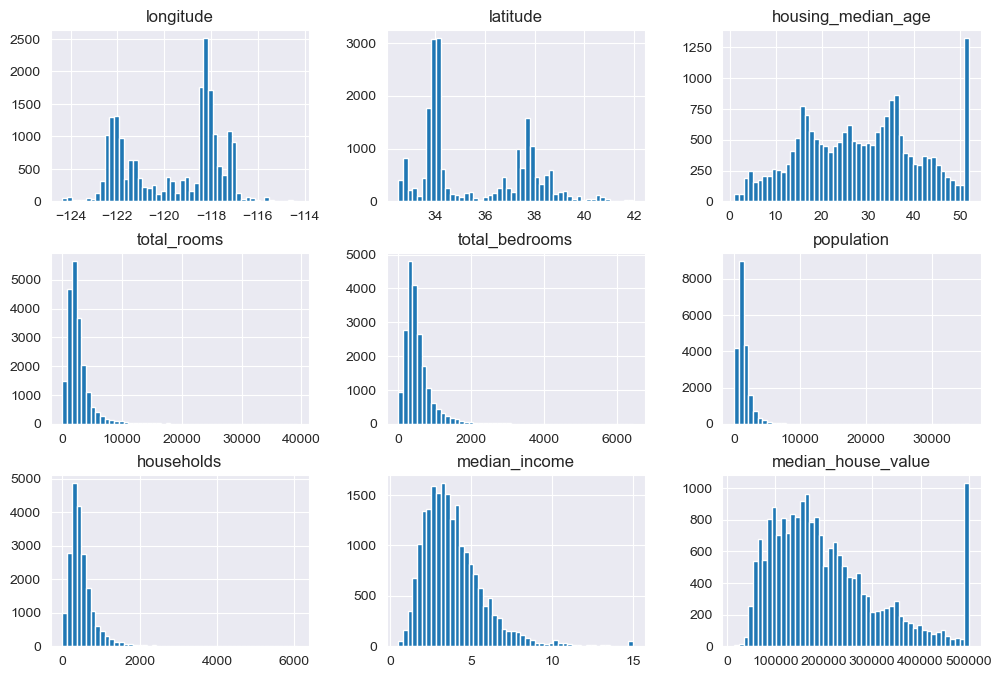

In [16]:
data.hist(bins=50, figsize=(12, 8))

Note: Different attributes have different scales. This will be handeled in feature scalining.

Note: Many histograms are skewed right (they extend much further to the right of the median than to the left). This may make it harder for some machine learning algorithm to detect patterns.

Note: The median income attribute is not expressed in US dollars. The data has been scaled and capped at 15 for higher median incomes and at 0.5c for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g. 3 = $30,000).
Potential issue: The housing median age and median house value were also capped. This is an issue since it is our target attribute (labels) and the machine learning algorithm may learn that prices neer go beyond that point.
Solution 1: If price predictions are needed beyond the $500,000 dollar mark, you can either collect proper labels when they are capped of remove those districs from the training and test set.

Before we continue to look at the data, it's important to set aside a "data snooping bias" to avoid overfitting. In this case we w ill set aside 20% of the data for testing.

In [23]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(data, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


Although this works, rerunning the function generates a different test set. Over time, you or the machine learning algorithm will see the whole dataset which is not what we want.
To fix this you can use the <code>np.random.seed(42)</code> before calling the
<code>np.random.permutation()</code> so that it generates the same shuffled indices. Or you can save the test set on the first run.


However, both these solutions will break when you fetch an updated dataset. To have a stable train/test split, a common solution is to use each instance's identifier to decide whether or not it should go in the test set (assuming instances have unique, immutable identifiers).

One way of doing this is by computing a hash of each instance's identifier and pyt that instance in the test set if the hash is <= 20% of maximum hash value. This ensures the test set doesent change on multiple runs. Here is an implementation:

<code>
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set (id_test_ratio))
    return data.loc[-in_test_set], data.loc[in_test_set]
<code>

Unfortunately, the housing dataset does not have an identifier column, but we can use it's row index as the ID. However, when doing this we need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, you can use the most stable feature to build a unique identifier (e.g: latitude/ longitude) for example:

<code>
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")
<code>

Scikit-Learn also provides functions to split datasets in various ways.
1. Simplest is <code>train_test_split()</code> (works similar to <code>shuffle_and_split_data()</code> with some add features.
There is a <code>random_state</code> parameter that allows you to set the random generator seed.
Implementation:
<code>
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
</code>